# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [2]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [3]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [4]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =  df.isnull().sum() # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (missing_summary / len(df)) * 100  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame({'# Faltante': missing_summary,
                                '% Faltante': missing_percent})  # ← COMPLETAR
    missing_info =  missing_info[missing_info['# Faltante']> 0].sort_values(by= '% Faltante', ascending=False) # ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [5]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,# Faltante,% Faltante
estadoTran,4331,95.082327
estado,2622,57.563117
Terreno,1728,37.936334
Area Construcción,1259,27.639956
tipoTran,3,0.065862
Total M²,1,0.021954


from matplotlib import pyplot as plt
_df_0['# Faltante'].plot(kind='hist', bins=20, title='# Faltante')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['% Faltante'].plot(kind='hist', bins=20, title='% Faltante')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='# Faltante', y='% Faltante', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['# Faltante'].plot(kind='line', figsize=(8, 4), title='# Faltante')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['% Faltante'].plot(kind='line', figsize=(8, 4), title='% Faltante')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='# Faltante', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='% Faltante', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [13]:
import missingno as msno

def grafico_distribucion_faltantes(original_data_df, missing_summary_df):
    # Get the names of columns that have missing values from the summary DataFrame's index
    columnas_a_mostrar = missing_summary_df.index.tolist()

    # Filter the original DataFrame to include only these columns for visualization
    df_subset = original_data_df[columnas_a_mostrar]

    print("Visualización de matriz de nulos (Missingno):")
    # Esto muestra dónde están los nulos. Las líneas blancas son datos faltantes.
    msno.matrix(df_subset, figsize=(10, 6))
    plt.title('Distribución de Valores Faltantes (Matriz de Nulos)', fontsize=16)
    plt.show()

    print("Mapa de calor de correlación de nulos (Missingno):")
    # Esto muestra si los nulos de una columna se correlacionan con los nulos de otra.
    # Un valor de 1 significa que si falta en A, siempre falta en B.
    # Un valor de -1 significa que si está presente en A, falta en B.
    msno.heatmap(df_subset, figsize=(10, 6))
    plt.title('Correlación de Nulos', fontsize=16)
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES
Visualización de matriz de nulos (Missingno):


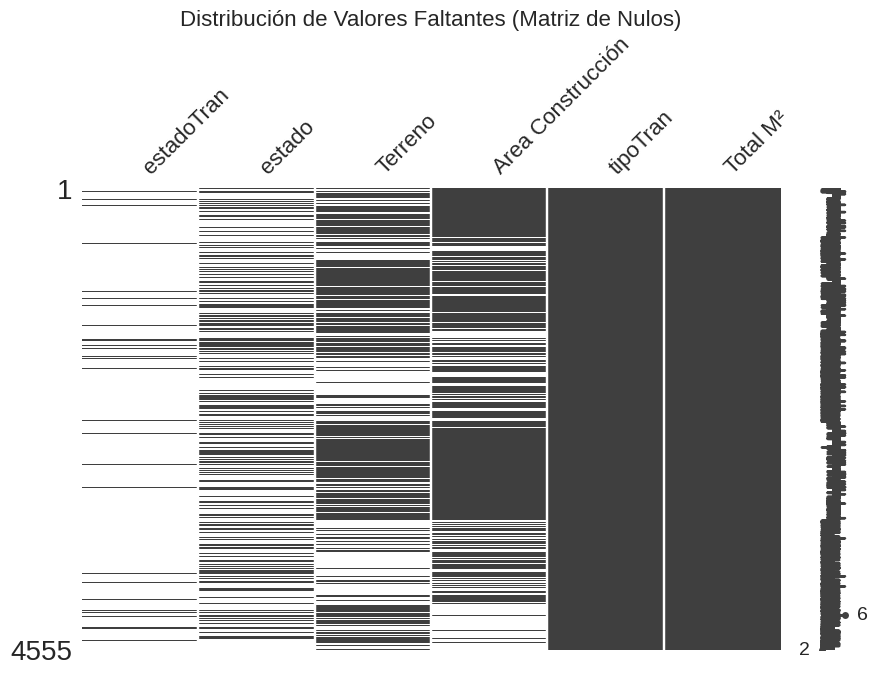

Mapa de calor de correlación de nulos (Missingno):


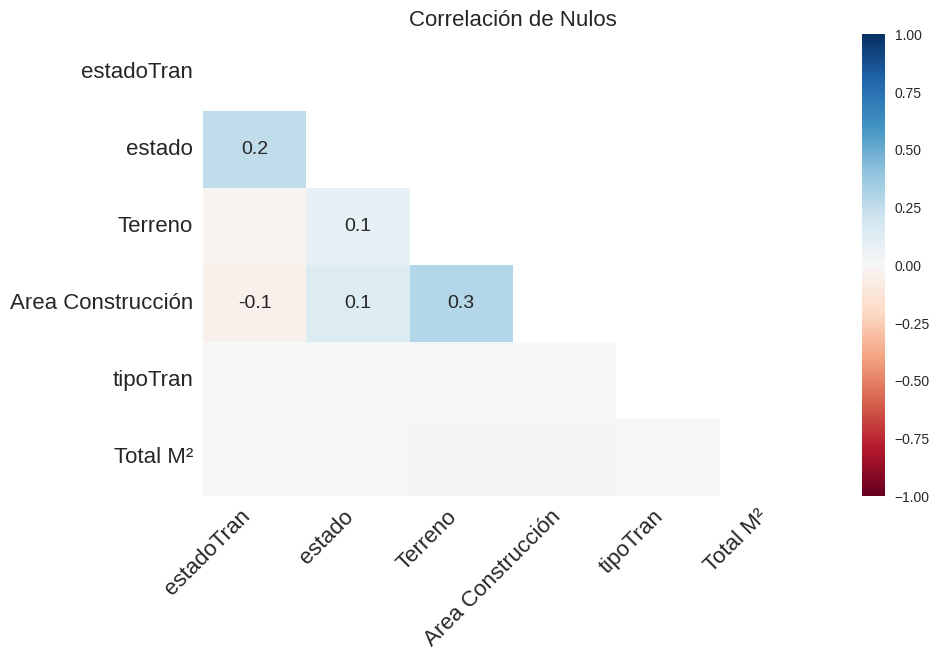

In [14]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(df, dfValoresFaltantes)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?

¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

1ra respuesta: las columnas con mayor porcentaje de valores faltantes son estadoTran, estado, Terreno y Area Construccion.

2da respuesta: Si, se observan patrones horizontales, donde a ciertas filas les falta múltiples datos en distintas columnas.

3ra Respuesta: Sí, hay correlaciones evidentes. El mapa de calor muestra una correlación fuerte (0.3) entre la nulidad de Area construccion y Terreno. Esto significa que cuando falta un dato en la Columna A, es muy probable que también falte en la Columna B."

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [15]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    df_numericas = df.select_dtypes(include=[np.number])
    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df_numericas.corr()  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    # ← COMPLETAR
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()



🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

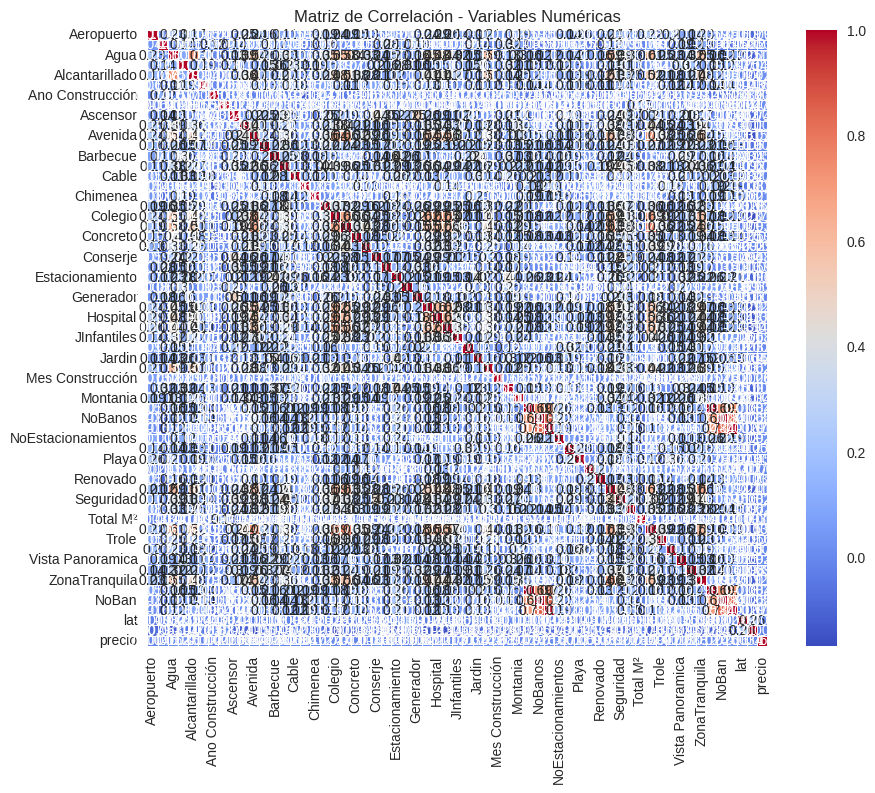

In [16]:
 # ← COMPLETAR Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?

¿Qué variables podrían predecir la presencia de valores faltantes?

Tras analizar la distribución y correlación de los valores faltantes usando la librería missingno, se concluye que el dataset presenta una mezcla de los tres tipos de valores faltantes (MCAR, MAR y MNAR).



# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [21]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
from sklearn.impute import SimpleImputer, KNNImputer

# Hacemos una copia para no dañar el original
df_imputado_num = df.copy()

# --- Preprocesamiento: Convertir 'NoMetros' a numérico ---
# Reemplazar comas por puntos (si son separadores decimales) o eliminar (si son miles)
# Asumiendo que es un separador de miles, lo eliminamos y convertimos a float
df_imputado_num['NoMetros'] = df_imputado_num['NoMetros'].astype(str).str.replace(',', '', regex=False)
df_imputado_num['NoMetros'] = pd.to_numeric(df_imputado_num['NoMetros'], errors='coerce')

# --- Estrategia 1: Media o Mediana (Bueno para MCAR) ---
# Usemos 'precio' como ejemplo
imputador_media = SimpleImputer(strategy='mean')
df_imputado_num['precio'] = imputador_media.fit_transform(df_imputado_num[['precio']])

# Usemos 'NoMetros' como ejemplo con mediana (mejor si hay outliers)
imputador_mediana = SimpleImputer(strategy='median')
df_imputado_num['NoMetros'] = imputador_mediana.fit_transform(df_imputado_num[['NoMetros']])

print("--- Después de imputar con Media/Mediana ---")
print(df_imputado_num[['precio', 'NoMetros']].isnull().sum())

# --- Estrategia 2: KNNImputer (Bueno para MAR) ---
# Usa los k vecinos más cercanos para "adivinar" el valor faltante.
# Es más lento pero generalmente más preciso.

# Seleccionamos solo columnas numéricas para KNN
columnas_numericas = df.select_dtypes(include=[np.number]).columns
df_imputado_knn = df.copy()

imputador_knn = KNNImputer(n_neighbors=5)
df_imputado_knn[columnas_numericas] = imputador_knn.fit_transform(df_imputado_knn[columnas_numericas])

print("\n--- Después de imputar con KNN ---")
print(df_imputado_knn[columnas_numericas].isnull().sum())


--- Después de imputar con Media/Mediana ---
precio      0
NoMetros    0
dtype: int64

--- Después de imputar con KNN ---
Aeropuerto        0
Aestrenar         0
Agua              0
Alarma            0
Alcantarillado    0
                 ..
NoBan             0
NoDorm            0
lat               0
lng               0
precio            0
Length: 61, dtype: int64


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [22]:
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos
from scipy.stats import chi2_contingency

# TODO: aplique el Chi-cuadrado (χ2)
# Vamos a probar si 'tipoInv' (Casa, Dpto) se relaciona con 'estado' (Usada, Aestrenar)

# 1. Creamos la tabla de contingencia
tabla_contingencia = pd.crosstab(df['tipoInv'], df['estado'])

print("--- Tabla de Contingencia ('tipoInv' vs 'estado') ---")
print(tabla_contingencia)

# 2. Aplicamos la prueba Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print(f"\nEstadístico Chi-cuadrado: {chi2:.2f}")
print(f"P-value: {p_value}")

# 3. Interpretamos el resultado
alpha = 0.05
if p_value < alpha:
    print(f"\nResultado: (p < {alpha}) Las variables ESTÁN relacionadas.")
else:
    print(f"\nResultado: (p >= {alpha}) Las variables SON independientes.")

--- Tabla de Contingencia ('tipoInv' vs 'estado') ---
estado        En Construcción / En Planos  PROBABLE  Por Estrenar  RESERVADA  \
tipoInv                                                                        
Casa                                   33         1           137         13   
Departamento                           26         2           216         12   
Inversión                               2         0             9          0   
Quinta                                  1         0             3          0   
Terreno                                16         1           126          8   

estado        Reconstruida/ Renovada  Usada  VENDIDA  
tipoInv                                               
Casa                              75    650       17  
Departamento                      55    392       13  
Inversión                          3     31        0  
Quinta                             0     18        1  
Terreno                            3     36       33  


# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [24]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
# Hacemos otra copia
df_imputado_cat = df.copy()

# --- Estrategia 1: Moda (Valor más frecuente) ---
# Bueno para MCAR.
imputador_moda = SimpleImputer(strategy='most_frequent')

# Ejemplo con la columna 'estado' (si tuviera nulos)
# df_imputado_cat['estado'] = imputador_moda.fit_transform(df_imputado_cat[['estado']])


# --- Estrategia 2: Constante (Crear una nueva categoría) ---
# Excelente para MNAR, porque tratamos la ausencia de dato como información.
imputador_constante = SimpleImputer(strategy='constant', fill_value='Desconocido')

# Supongamos que 'tipoInv' tiene nulos y queremos marcarlos
# Flatten the 2D array output from fit_transform to a 1D array using [:, 0]
df_imputado_cat['tipoInv'] = imputador_constante.fit_transform(df_imputado_cat[['tipoInv']])[:, 0]

print("Valores únicos en 'tipoInv' después de imputar con 'Desconocido':")
print(df_imputado_cat['tipoInv'].unique())

Valores únicos en 'tipoInv' después de imputar con 'Desconocido':
['Departamento' 'Casa' 'Quinta' 'Terreno' 'Inversión']


✅ RESULTADOS:

¿Qué columnas presentaron mayores desafíos para la imputación?

¿En qué casos consideraron que la eliminación era mejor que la imputación?

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

1ra Respuesta:

Generalmente son las que tienen un alto porcentaje de nulos (Ej: > 50%). Imputar tantos datos puede inventar patrones que no existen. También las MNAR son difíciles porque debes entender por qué falta el dato.

2da Respuesta:

Eliminar Filas: Si a una fila le faltan casi todas las columnas (es inútil) o si tienes muchísimos datos y solo te faltan unos pocos (Ej: < 1% de nulos).

Eliminar Columnas: Si a una columna le falta un porcentaje altísimo (Ej: > 70-80%) o si la columna no es relevante para tu análisis.

3ra Respuesta:

MCAR: Es el más fácil. Puedes usar imputación simple (media, mediana, moda) o incluso eliminar las filas si son pocas.

MAR: Es más complejo. La imputación simple puede sesgar tus datos. Es mejor usar métodos multivariables como KNNImputer o IterativeImputer (que usa regresión) porque pueden "adivinar" el valor faltante basándose en las otras variables con las que se relaciona.

MNAR: Es el más difícil. La imputación suele ser una mala idea. A menudo, la mejor estrategia es tratar la ausencia como una categoría en sí misma (como hicimos con fill_value='Desconocido') o crear una nueva columna "binaria" (Ej: tenia_precio_faltante = 1 o 0).


# 🚀 ¡TALLER FINALIZADO!"